In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt

from MasterFunctions_V1 import *
import seaborn as sns
import math
import altair as alt

# Matplot Libs 

from matplotlib.colors import LinearSegmentedColormap
# Ml Libs 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.utils.class_weight import compute_sample_weight
#regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score

In [2]:
from xgboost import XGBClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


In [3]:
Source=pd.read_csv('train.csv')

print('DataSize is ', Source.shape)
Source['index']=Source.index
SourceRaw=Source

DataSize is  (101763, 23)


In [4]:
Source["defects"].dtype

dtype('bool')

In [5]:
Source["Target"]=  Source["defects"].apply(lambda x: 1 if x else 0)

In [6]:
Source["defects"].value_counts()
Source["Target"].value_counts()

0    78699
1    23064
Name: Target, dtype: int64

0    0.773356
1    0.226644
Name: Target, dtype: float64


Text(0.5, 1.0, 'Target Distribution')

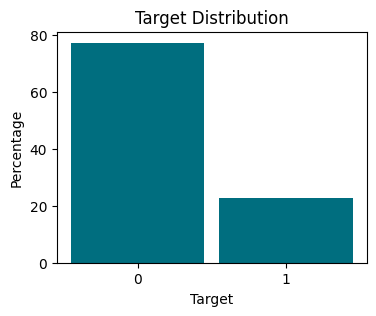

In [7]:
# Step 1: Target Distribution Check in Training Data 
# Checking Target Distribution for Defect 

Target=Source['Target']
Source['index']=Source.index
Key=Source['index']


# Calculating target 

Targetdf=Source.groupby(['Target'])['index'].count().reset_index()
Targetdf['Percentage'] = Targetdf.groupby(Target)['index'].transform(lambda x: x / x.sum() * 100)
print(Source['Target'].value_counts()/Source.shape[0])


# # Plotting target
plt.figure(figsize=(4, 3))
Targetdf['Target']=Targetdf['Target'].astype(str)
plt.bar( Targetdf['Target'], Targetdf['Percentage'],color='#006E7F', width=0.9, align='center') 

plt.xlabel('Target')
plt.ylabel('Percentage')
plt.title('Target Distribution')


In [8]:
# Plot of Target with Cols 

def Scatter_Plotwithtarget(df,x,y,z):
    sns.scatterplot(x=x, y=y,hue=z)

plt.figure(figsize=(5, 3))
def Bar_Plotwithtarget(df,x,y,z):
    sns.countplot(x=x,hue=z,palette="crest")





<Figure size 500x300 with 0 Axes>

In [9]:
outdf_numeric = CalBasicStats(Source,'numeric')
outdf_nonnumeric = CalBasicStats(Source,'Non-numeric')

In [10]:
# variables which can be considered or removing vbecause of sparsity and lack of variation :

# # Total day minutes  # has very high variance 
# # Total intl calls  # High Skeness (gap between max and Average)

# SeniorCitizen #has very high value of zero (72%)
# customerID and index remove 

# variable Transformation 



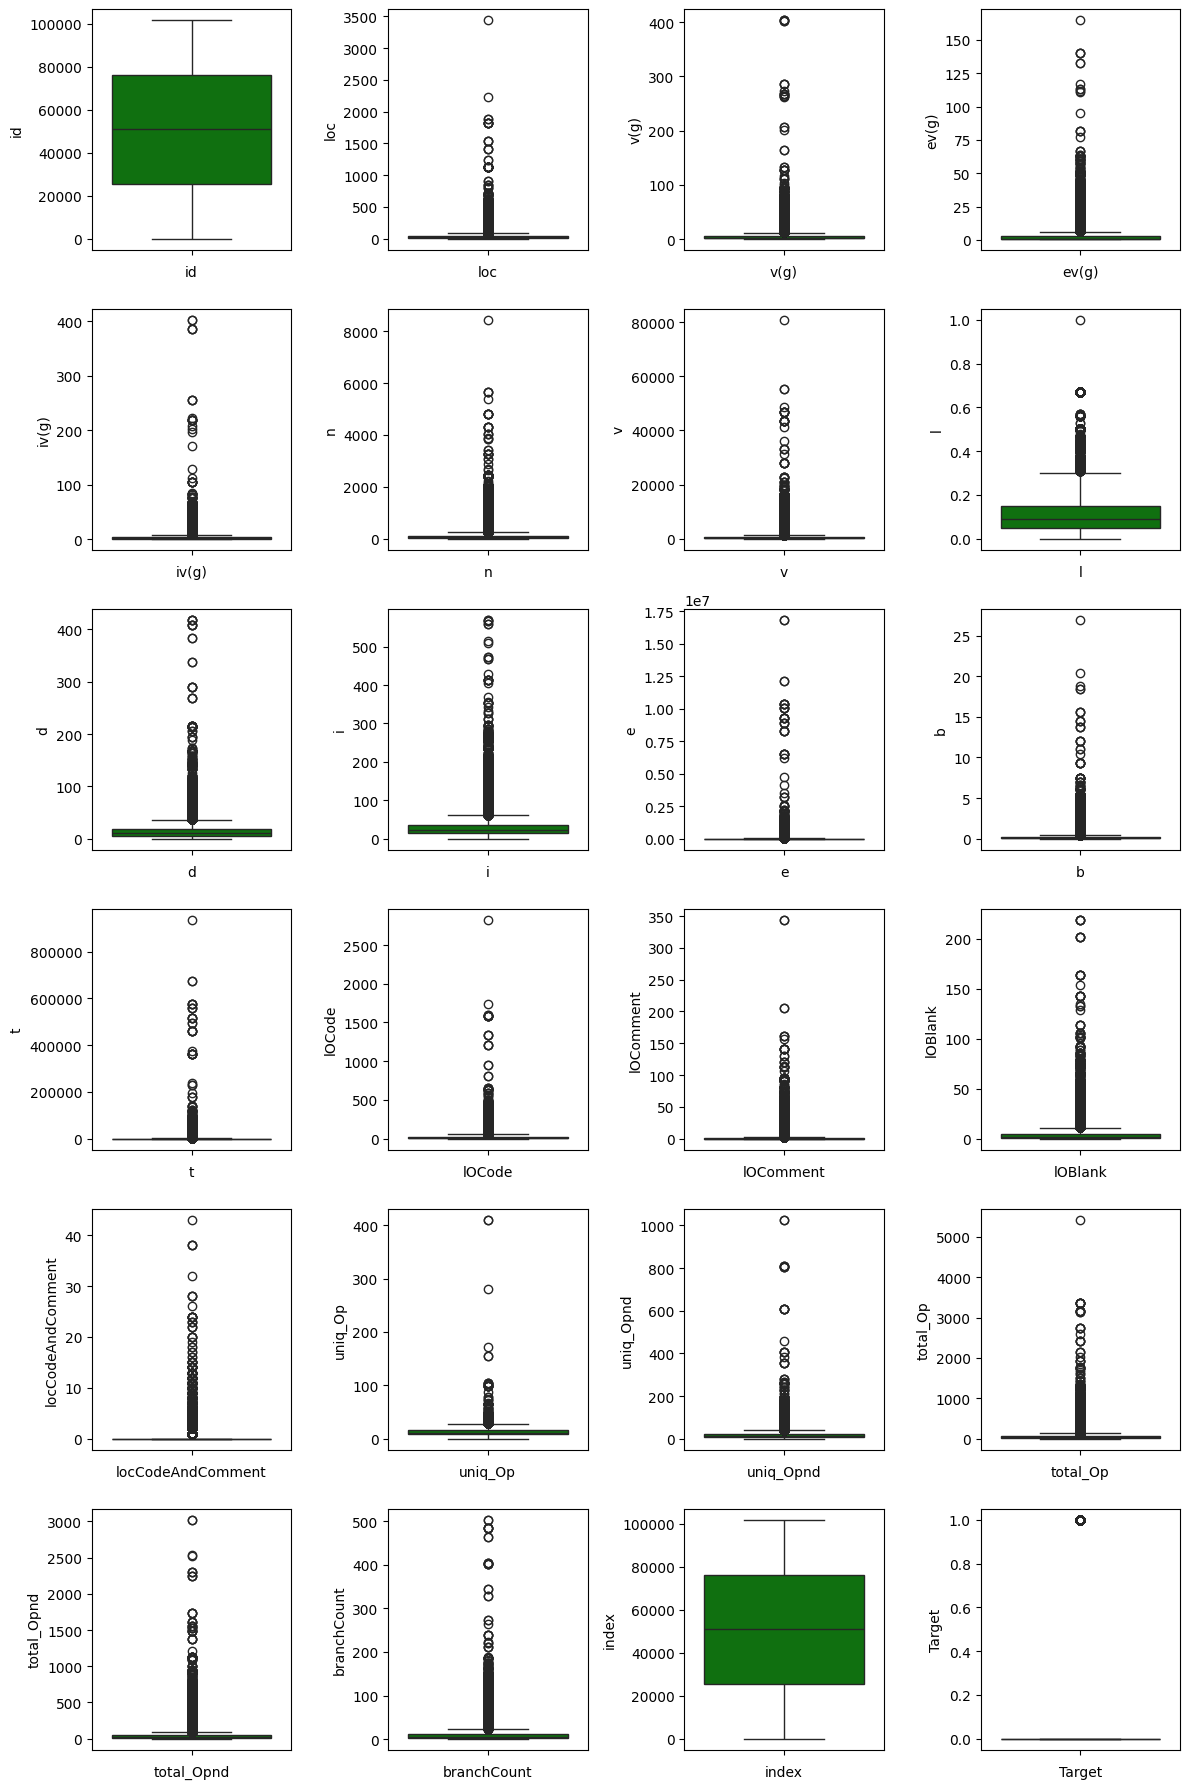

In [11]:
# Step 3.1 : Check for outliers using the Box Plots 

Cols_numeric=outdf_numeric['ColumnName'].unique()
# Cols_numeric2=outdf_nonnumeric['ColumnName'].unique()

CustomPlots(Source[Cols_numeric],'box')

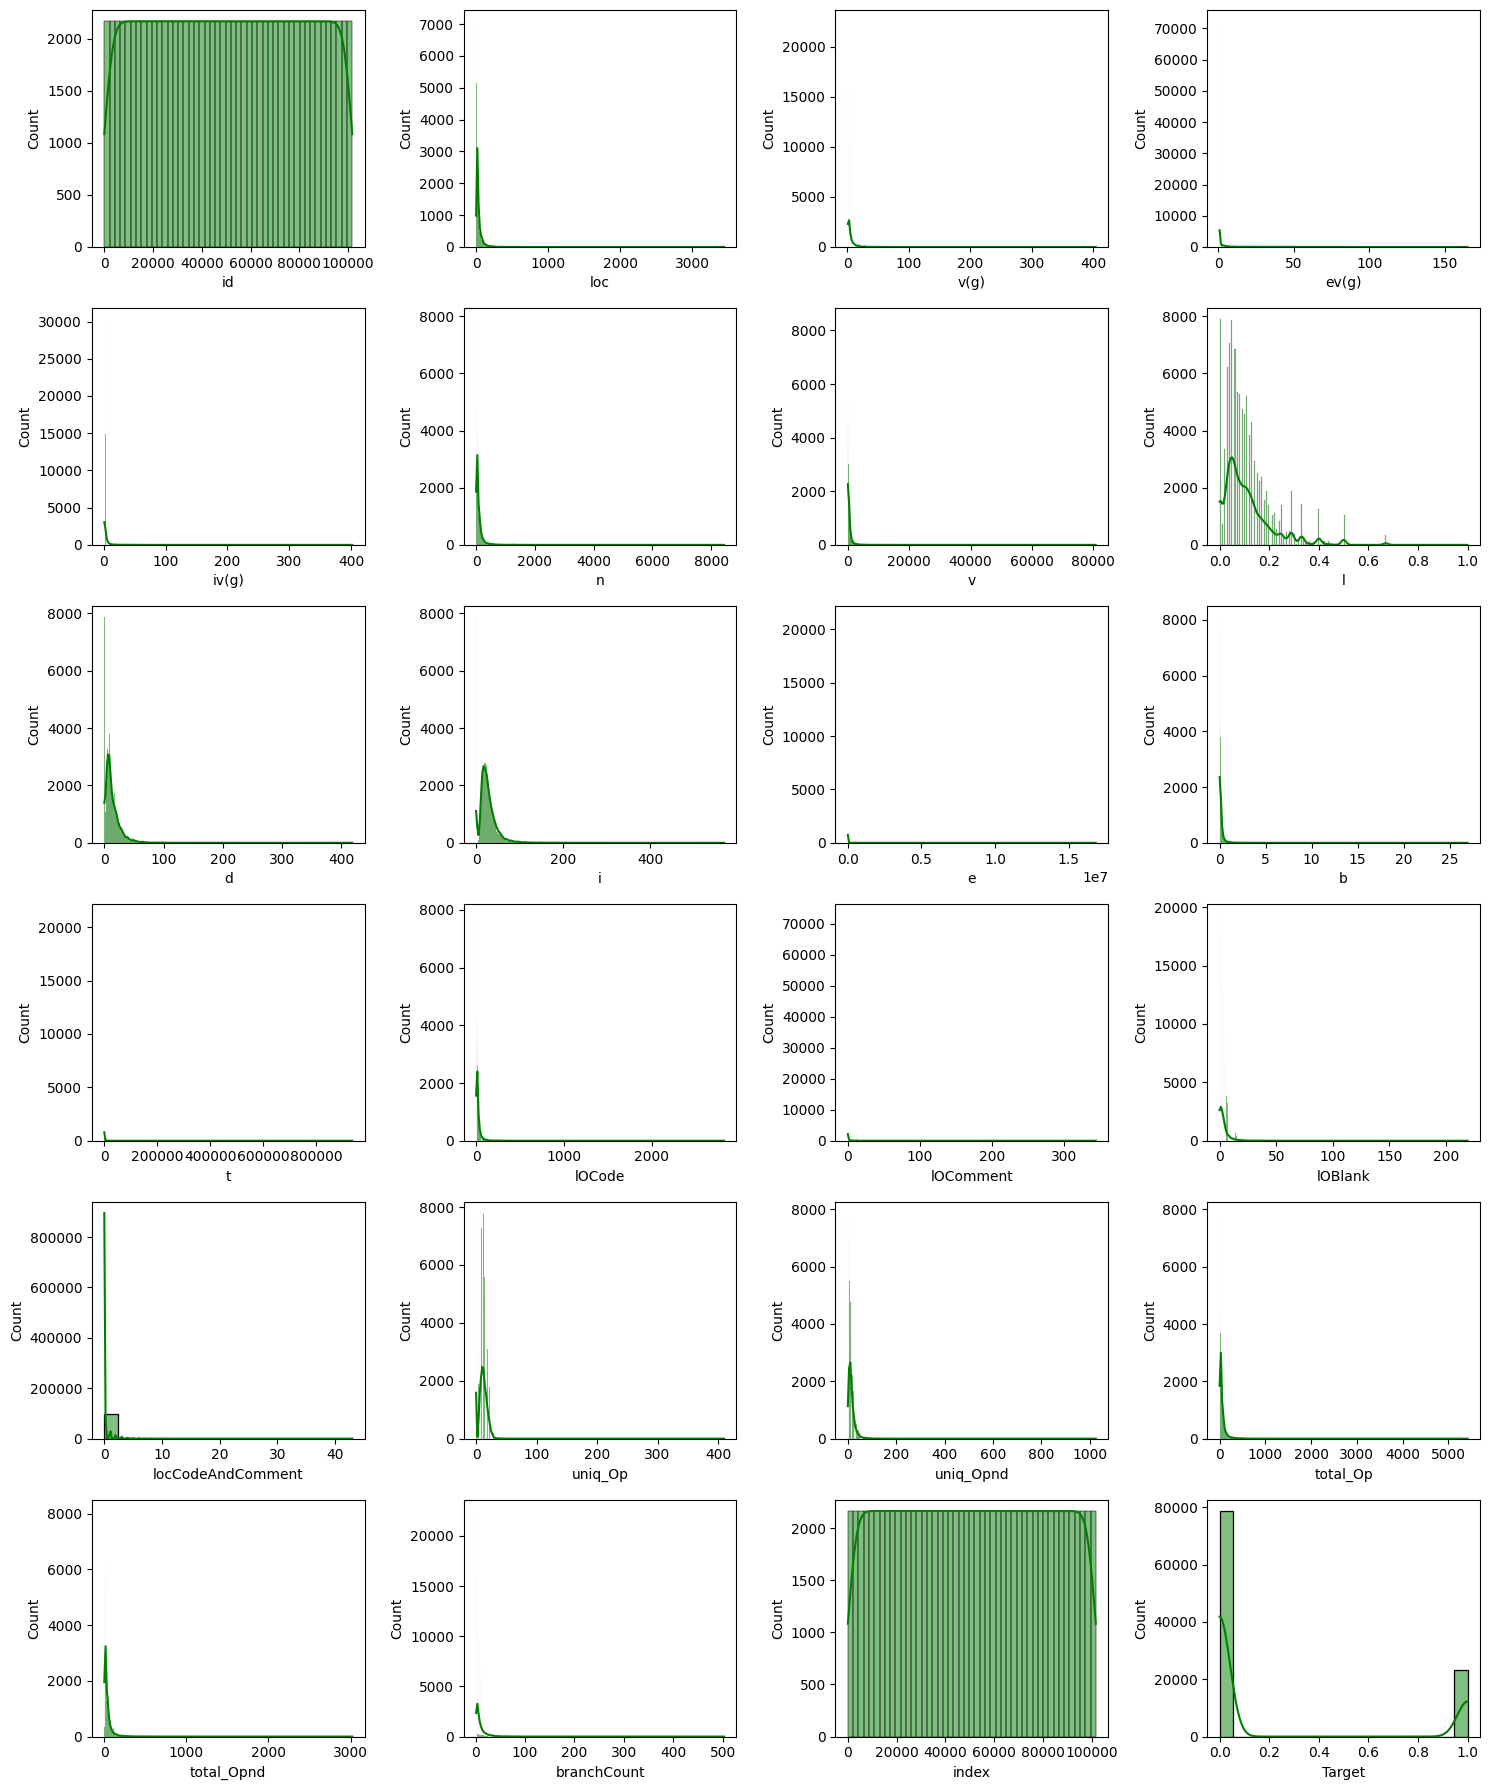

In [12]:
Cols_numeric=outdf_numeric['ColumnName'].unique()
CustomPlots(Source[Cols_numeric],'hist')

<Axes: >

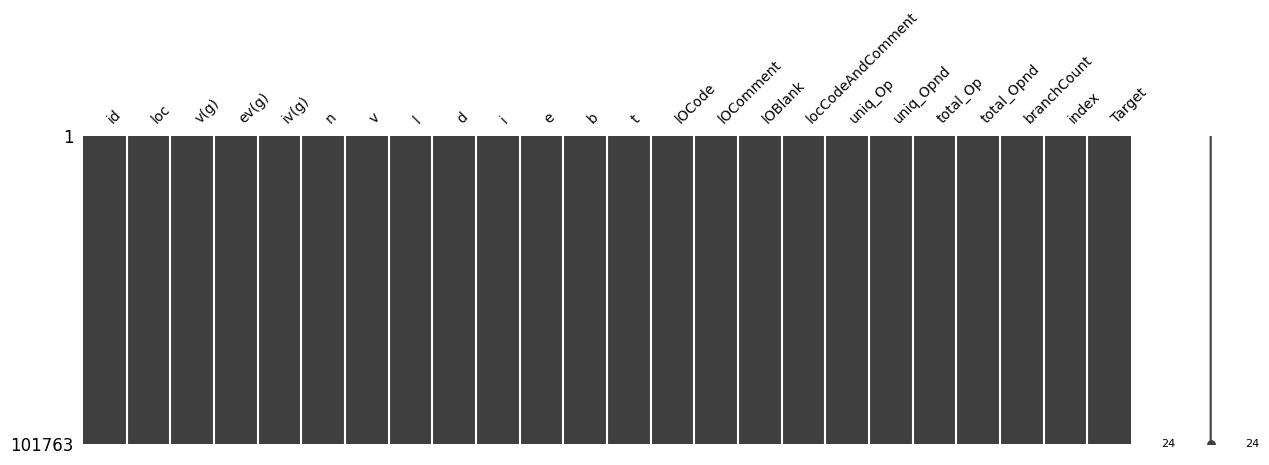

In [15]:
# Step 3.2 : Check for Missing Values using the Box Plots 

import missingno as msno
# msno.matrix(Source[Cols_numeric], figsize=(15, 4), fontsize=10)
msno.matrix(Source[Cols_numeric], figsize=(15, 4), fontsize=10)


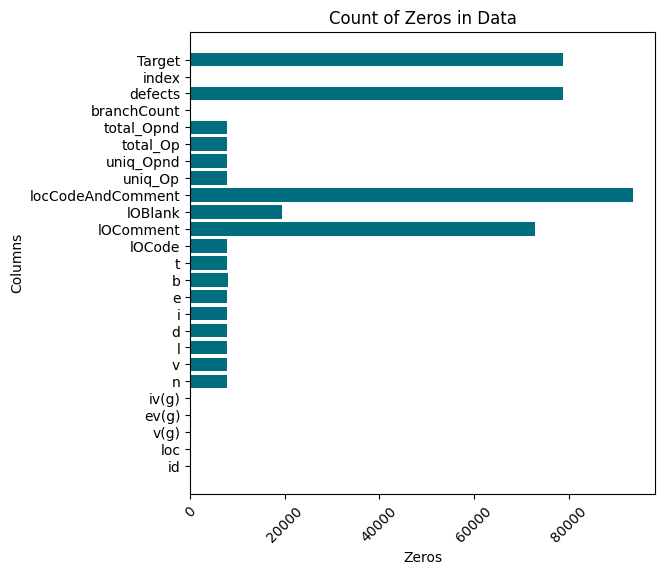

In [16]:
# Step 3.3 : Check for Zero Values using the Box Plots 


zero_counts = (Source == 0).sum()

# Plot the counts
plt.figure(figsize=(6,6))
plt.barh(zero_counts.index, zero_counts.values, color='#006E7F')
plt.xlabel('Zeros')
plt.ylabel('Columns')
plt.title('Count of Zeros in Data')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Step 4 : Feature Selection 

AllFeatures=SourceRaw.columns.to_list()
SelectedFeatures=AllFeatures



# Step 4.0: Remove PrimaryKey, sequence etc features 
cols0=['index']
for i in cols0:
    SelectedFeatures.remove(i)

SelectedFeatures


# Step 4.1 : Removal very high missing values columns 

# No Null in Data 
outdf_numeric=outdf_numeric[outdf_numeric['ColumnName'].isin(SelectedFeatures)]
SelectedFeatures= np.where((outdf_numeric["%Missing"]<40),outdf_numeric["ColumnName"],'Target')
SelectedFeatures=set(SelectedFeatures)

#Columns only with <50% Available values 

# Step 4.2 : Removal of very high zero values  

outdf_numeric=outdf_numeric[outdf_numeric['ColumnName'].isin(SelectedFeatures)]
SelectedFeatures= np.where((outdf_numeric["%Zero"]<40),outdf_numeric["ColumnName"],'Target')
SelectedFeatures=set(SelectedFeatures)
SelectedFeatures =SelectedFeatures 

SelectedFeatures



{'Target',
 'b',
 'branchCount',
 'd',
 'e',
 'ev(g)',
 'i',
 'id',
 'iv(g)',
 'l',
 'lOBlank',
 'lOCode',
 'loc',
 'n',
 't',
 'total_Op',
 'total_Opnd',
 'uniq_Op',
 'uniq_Opnd',
 'v',
 'v(g)'}

In [18]:

# Step 4.3. Treatment of outlier columns 

# Outlier columns 
# 1. Apart from a few , rest all we see close to the upper limit in BoX Plot , 
#         1.a so we can always put them to higher limit 
#         2.a or leave them as is 
# 2. For the ones where we see high values 
#         1. we will treat them based on the distribution and domain idea 

Source=SourceRaw[SelectedFeatures]

# Scatter_Plotwithtarget(Source,Source['l'],Source.index,Source['Target'])
# print('before',Source.shape)
# Source=remove_outliers_iqr(Source,'l')
# print('After',Source.shape)
# Scatter_Plotwithtarget(Source,Source['l'],Source.index,Source['Target'])

/var/folders/6y/6hsqd4ts2n3cjf9tpct0b36h0000gp/T/ipykernel_47891/644353189.py:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Source=SourceRaw[SelectedFeatures]


In [19]:
# Step 4.4 : Correlation with categorical 



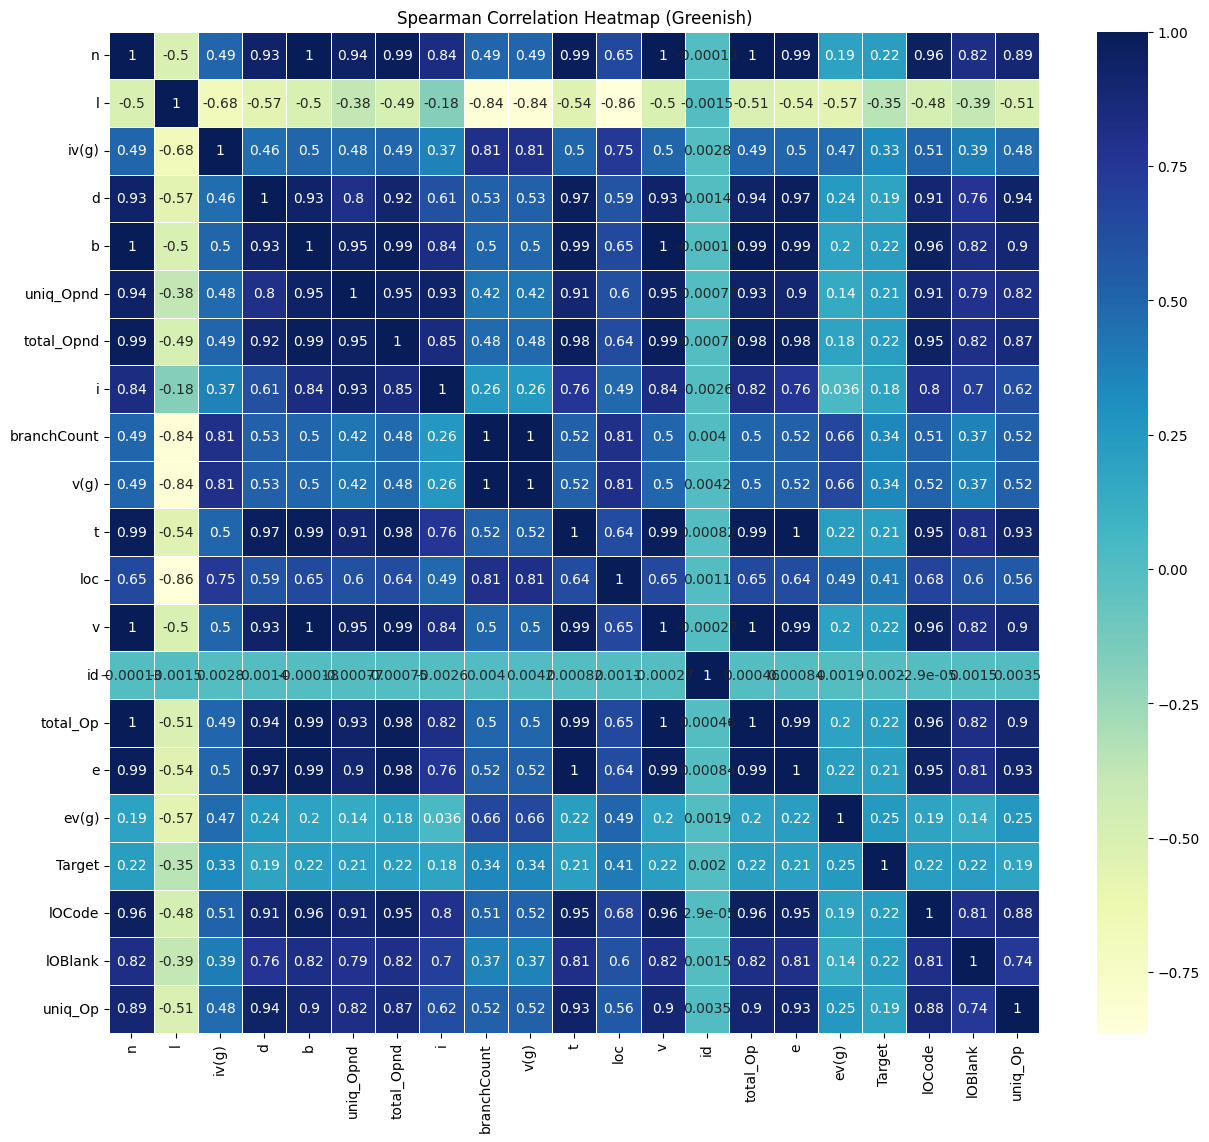

In [20]:
# Selecting highly Correlated features with Target
# Step 4.6 : Correlation with All 


Source=Source

spearman_corr = Source.corr(method='spearman')

plt.figure(figsize=(15, 13))  # Set the figure size
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', linewidths=0.5)  # Use 'YlGnBu' colormap
plt.title('Spearman Correlation Heatmap (Greenish)')
plt.show()


In [21]:


CorrelationDF=pd.DataFrame()
CorrelatedList,CorrelationDF=CorrAttributesList(Source,'Target',0.02)
CorrelatedList=CorrelatedList.to_list()

CorrelatedList

#Function to eliminate multicoliniearity 

['n',
 'l',
 'iv(g)',
 'd',
 'b',
 'uniq_Opnd',
 'total_Opnd',
 'i',
 'branchCount',
 'v(g)',
 't',
 'loc',
 'v',
 'total_Op',
 'e',
 'ev(g)',
 'Target',
 'lOCode',
 'lOBlank',
 'uniq_Op']

In [22]:
def CorrAttributesList(data,Target,ThreshHold):
    EDA_df=data 
    correlation_values_P= EDA_df.corr(method='pearson')[Target]
    correlation_values_S= EDA_df.corr(method='spearman')[Target]
    EDA_concatenated_Correlation_df = pd.concat([correlation_values_P, correlation_values_S], axis=1,keys=['Pearson', 'Spearman'])

    for i in EDA_concatenated_Correlation_df.columns :
        j='Abs'+i
        EDA_concatenated_Correlation_df[j]=abs(EDA_concatenated_Correlation_df[i])
    Selected = EDA_concatenated_Correlation_df[(EDA_concatenated_Correlation_df["AbsPearson"]>ThreshHold) 
                                           | (EDA_concatenated_Correlation_df["AbsSpearman"]>ThreshHold)] 
                                  
    Selected_list=Selected.index

    return Selected_list,Selected

Selected_list=CorrAttributesList(Source,'Target',0.05)
Selected_list

(Index(['n', 'l', 'iv(g)', 'd', 'b', 'uniq_Opnd', 'total_Opnd', 'i',
        'branchCount', 'v(g)', 't', 'loc', 'v', 'total_Op', 'e', 'ev(g)',
        'Target', 'lOCode', 'lOBlank', 'uniq_Op'],
       dtype='object'),
               Pearson  Spearman  AbsPearson  AbsSpearman
 n            0.258080  0.219614    0.258080     0.219614
 l           -0.253237 -0.346818    0.253237     0.346818
 iv(g)        0.245618  0.332306    0.245618     0.332306
 d            0.241936  0.190798    0.241936     0.190798
 b            0.232594  0.220969    0.232594     0.220969
 uniq_Opnd    0.246113  0.213307    0.246113     0.213307
 total_Opnd   0.252752  0.217506    0.252752     0.217506
 i            0.208577  0.182773    0.208577     0.182773
 branchCount  0.322827  0.344393    0.322827     0.344393
 v(g)         0.301187  0.344532    0.301187     0.344532
 t            0.099592  0.214050    0.099592     0.214050
 loc          0.342642  0.409508    0.342642     0.409508
 v            0.231179  0.22

<Axes: >

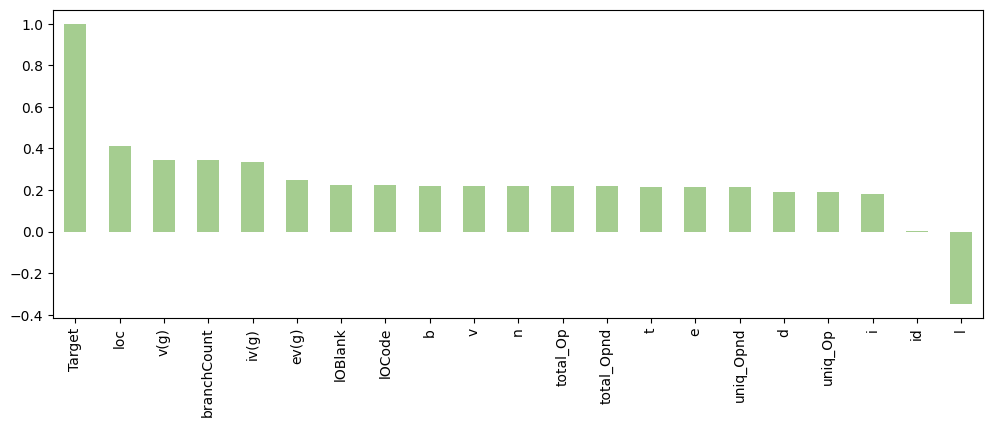

In [23]:
Source=Source

# spearman_corr = Source.corr(method='spearman')

# mask = np.triu(spearman_corr <= 0.5)

# plt.figure(figsize=(25, 20))  # Set the figure size
# # sns.heatmap(spearman_corr, annot=True, cmap='crest', linewidths=0.5)  # Use 'YlGnBu' colormap
# sns.heatmap(spearman_corr, annot=True, fmt=".1f", cmap='crest', mask=mask,vmin=-1, vmax=1)
# plt.title('Spearman Correlation Heatmap (Greenish)')
# plt.show()

plt.figure(figsize=(12,4))
Source.corr(method='spearman')['Target'].sort_values(ascending = False).plot(kind='bar',cmap='crest')

In [24]:
# Source=SourceRaw[CorrelatedList]
# # Remove highly Correlated 
# # CorrelatedList.remove('Total eve minutes')
# # CorrelatedList.remove('Total intl minutes')
# # CorrelatedList.remove('Total night charge')

# SelectedFeatures=CorrelatedList

Source.head()

,n,l,iv(g),d,b,uniq_Opnd,total_Opnd,i,branchCount,v(g),...,loc,v,id,total_Op,e,ev(g),Target,lOCode,lOBlank,uniq_Op
0,60.0,0.06,2.0,19.56,0.09,9.0,22.0,14.25,5.0,3.0,...,22.0,278.63,0,38.0,5448.79,1.0,0,17,1,16.0
1,32.0,0.14,2.0,7.00,0.05,11.0,14.0,21.11,3.0,2.0,...,14.0,151.27,1,18.0,936.71,1.0,0,11,1,11.0
2,45.0,0.11,2.0,8.05,0.07,11.0,17.0,22.76,3.0,2.0,...,11.0,197.65,2,28.0,1754.01,1.0,0,8,1,12.0
3,23.0,0.19,1.0,5.25,0.03,6.0,7.0,17.86,1.0,1.0,...,8.0,94.01,3,16.0,473.66,1.0,1,4,2,8.0
4,17.0,0.18,2.0,5.63,0.02,6.0,10.0,12.44,3.0,2.0,...,11.0,60.94,4,10.0,365.67,1.0,0,7,2,7.0


In [25]:
SelectedFeatures=Source.columns
SelectedFeatures=SelectedFeatures.to_list()

In [26]:
# Step 6.1 : Bi variate using Dtree 

Resultdf1,model = DtreeCreator(Source,'loc','Target',2)
Resultdf1
PlotDtreeGraph2(Resultdf1)


loc 


/Users/rohit.jishtu/Documents/My Projects/GIt Bkp/Projects/ML Projects/Project 1 - Binary Classification/MasterFunctions_V1.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TreeDf_NA.rename(columns = {var1:'X',Target:'Y'}, inplace = True)


alt.LayerChart(...)

In [27]:
# Exporting The Tree

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None,
                           feature_names='X',
                           class_names='Target',
                           filled=True, rounded=True,
                           special_characters=True)


graph = graphviz.Source(dot_data)
# Save the decision tree visualization as an image
graph.render('decision_tree_sample1')


ModuleNotFoundError: No module named 'graphviz'

In [28]:
#Step 7 : Model Build Logictic , Decision Tree and randowm Forest 

#Features removed as part of TargetLeakage
Targets = ['Target','index','defects']

FeatureList= [x for x in SelectedFeatures if x not in Targets]

X=Source[FeatureList]
Y=Source['Target']


In [29]:
# X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce', downcast='float')

# X = X.fillna(X.median())

In [30]:

#------------------------------------------------------------------------
# Random train test split And Model Build

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model='Dtree'
# Dtree_Model_clf = DecisionTreeClassifier(max_depth=5)
Dtree_Model_clf = DecisionTreeClassifier(criterion='entropy',
                                         max_depth=6,
                                         max_features=None,
                                         min_samples_split=5,
                                         min_samples_leaf=2,
                                         class_weight='balanced')


Model='RandomForest'
RF_Model_clf = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    criterion='entropy',      # Split criterion: 'gini' or 'entropy'
    max_depth=6,        # Maximum depth of the trees (None means unlimited)
    min_samples_split=5,   # Minimum number of samples required to split an internal node
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
    max_features='auto',   # Number of features to consider for the best split ('auto' is sqrt(n_features))
    random_state=None  ,   # Seed for random number generator (None for random)
    class_weight='balanced'    
)

Model='XGBoost'
XGBModel = XGBClassifier( 
 learning_rate =0.1,
 n_estimators=100,
 max_depth=7,
 min_child_weight=0.5,
 gamma=5,
 subsample=1,
 colsample_bytree=0.4,
 objective= 'binary:logistic',
 nthread=4 , 
 scale_pos_weight=1,
 seed=27,
 eval_metric='auc')




In [31]:
custom_threshold=0.25

#Model Predict

if Model=='Dtree':
    Dtree_Model_clf.fit(X_train, y_train)
    y_pred = Dtree_Model_clf.predict(X_test)
    y_pred_proba=Dtree_Model_clf.predict_proba(X_test)
    predicted_class1 = (y_pred_proba[:, 1] >= custom_threshold).astype(int)
elif Model=='RandomForest':
    RF_Model_clf.fit(X_train, y_train)
    y_pred = RF_Model_clf.predict(X_test)
    y_pred_proba=RF_Model_clf.predict_proba(X_test)
    predicted_class1 = (y_pred_proba[:, 1] >= custom_threshold).astype(int)
elif Model=='XGBoost':
    XGBModel.fit(X_train, y_train)
    y_pred = XGBModel.predict(X_test)
    y_pred_proba=XGBModel.predict_proba(X_test)
    predicted_class1 = (y_pred_proba[:, 1] >= custom_threshold).astype(int)



#Confusion matrix 
cm1 = confusion_matrix(y_test, predicted_class1)
#Feature Importance 
if Model=='Dtree':
    feature_importances = Dtree_Model_clf.feature_importances_
elif Model=='RandomForest':
    feature_importances = RF_Model_clf.feature_importances_
elif Model=='XGBoost':
    feature_importances = XGBModel.feature_importances_


Accuracy: 0.7626394143369528
Precision: 0.4752005238173187
Recall: 0.6411219081272085
F1 Score: 0.5458305913321426
AUC: 0.719265535422214


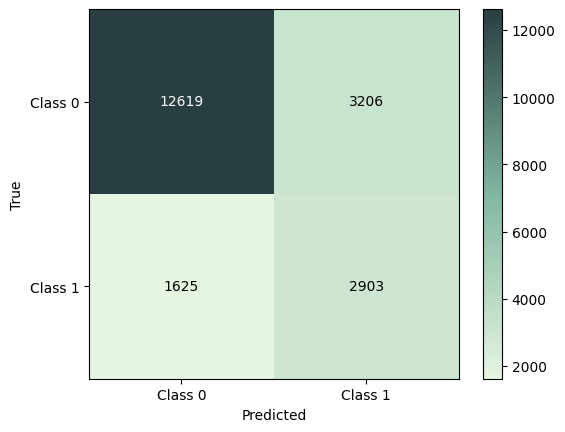

In [32]:
#Step 8 : Model Matrix on Fist Test Set 
from sklearn.metrics import roc_curve, auc,f1_score,roc_auc_score

# Calculate accuracy [Built in function]
accuracy = accuracy_score(y_test, predicted_class1)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, predicted_class1)
print("Precision:", precision)
# Calculate recall
recall = recall_score(y_test, predicted_class1)
print("Recall:", recall)

f1 = f1_score(y_test, predicted_class1)
print("F1 Score:", f1)
# Calculate AUC

auc = roc_auc_score(y_test, predicted_class1)
print("AUC:", auc)

plot_ConfusionMatrix(cm1)

#Last deployed Model
# Accuracy: 0.7245146259383899
# Precision: 0.4383408071748879
# Recall: 0.704345868047737
# F1 Score: 0.5403817914831132
# AUC: 0.7174411873518234

#XGBoost 0.50
# Accuracy: 0.8140814621923058
# Precision: 0.6253369272237197
# Recall: 0.4098939929328622
# F1 Score: 0.49519743863393817
# AUC: 0.6698127152657992


#XGBoost 0.30
# Accuracy: 0.7614602269935636
# Precision: 0.4734362307067425
# Recall: 0.6435512367491166
# F1 Score: 0.5455396424225406
# AUC: 0.7193743545514935

In [33]:
#Step 8.2 : Model Matrix on Hidden Scoring Set 

Targets = ['Target','defects']

Test=pd.read_csv('/Users/rohit.jishtu/Documents/My Projects/Project Personal/Kaggle/Project 1 Binary Classification/test.csv')
Test["Target"]= None
FeatureList= [x for x in SelectedFeatures if x not in Targets]
X=Test[FeatureList]



#Model Predict
# 

y_pred2 = XGBModel.predict(X)
y_pred2_proba=XGBModel.predict_proba(X)
predicted_class2 = (y_pred2_proba[:, 1] >= custom_threshold).astype(int)


# cm2 = confusion_matrix(Y, predicted_class2)

# # Calculate accuracy [Built in function]
# accuracy = accuracy_score(Y, predicted_class2)
# print("Accuracy:", accuracy)
# # Calculate precision
# precision = precision_score(Y, predicted_class2)
# print("Precision:", precision)
# # Calculate recall
# recall = recall_score(Y, predicted_class2)
# print("Recall:", recall)

# f1 = f1_score(Y, predicted_class2)
# print("F1 Score:", f1)
# # Calculate AUC

# auc = roc_auc_score(Y, predicted_class2)
# print("AUC:", auc)



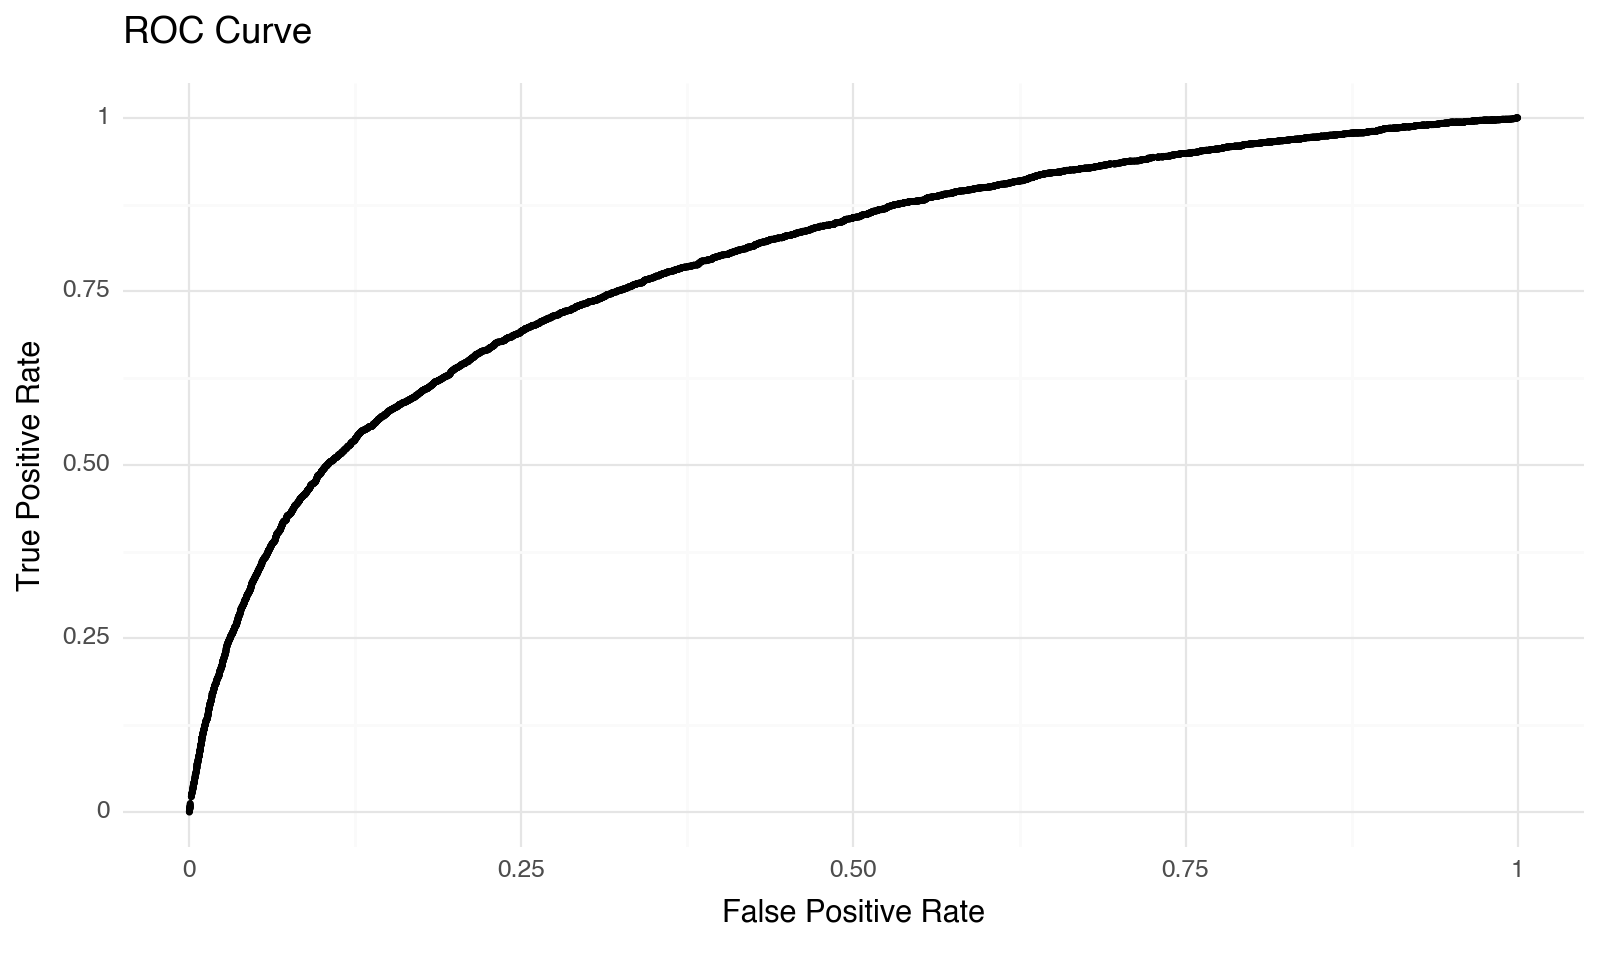

<Figure Size: (800 x 480)>

In [43]:
#Step 8.3 : Finding the optimum threshhold
from plotnine import *
import plotnine
# Step 1 :  Create the ROC curve



fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr


# Step 2 :  ROC Curve Plots 

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate')+
    ylab('True Positive Rate')+
    theme_minimal()
)

[0.         0.02972191 0.0393184  ... 0.01946955 0.         0.        ]
Best Threshold: 0.21040000021457672 with G-Mean: 0.7213
FPR: 0.2531, TPR: 0.6966


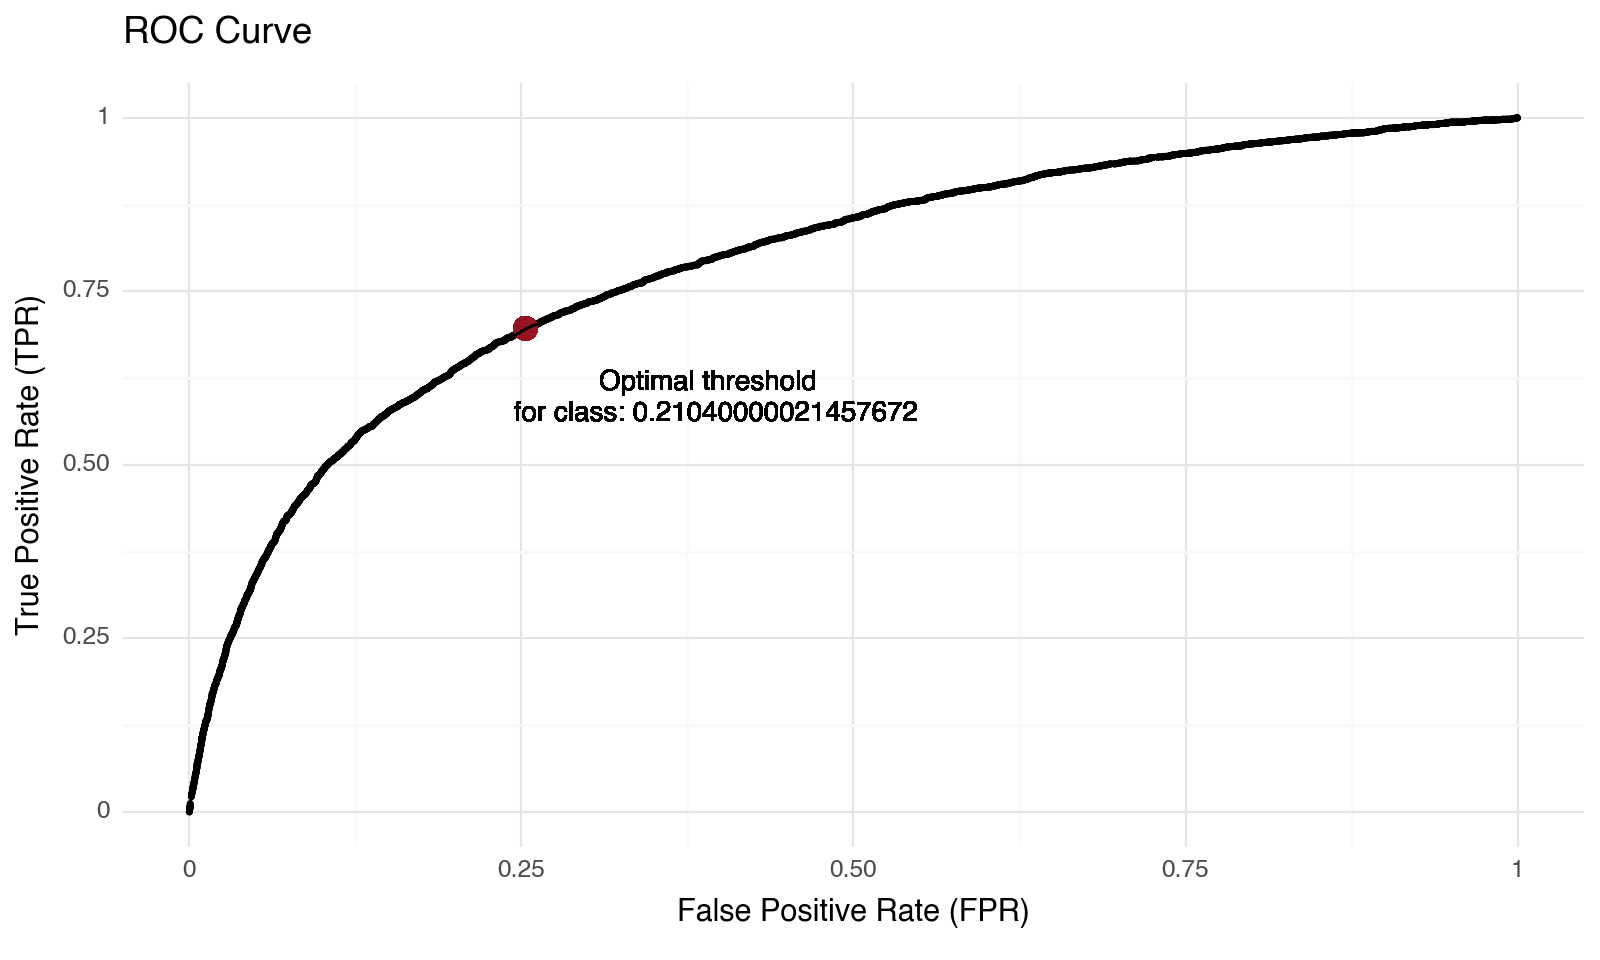

<Figure Size: (800 x 480)>

In [44]:

#Step 3 : G-mean= Geometric Mean of recall and Specificity 


gmean = np.sqrt(tpr * (1 - fpr))

print(gmean)

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))



#Step 4 : G-mean= Geometric Mean of recall and Specificity 
gmean = np.sqrt(tpr * (1 - fpr))


# Find the optimal threshold
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [45]:
# Create two subplots side by side
# plot_ConfusionMatrix(cm2)

In [46]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

# def plot_ConfusionMatrix(cm):
#     # Define the custom colormap
#     bright_green_colormap = LinearSegmentedColormap.from_list(
#         'bright_green', [(0, '#E5F5E0'), (0.5, '#80B6A1'), (1, '#293E40')])

#     # Create a figure and axis for the confusion matrix
#     fig, ax = plt.subplots()

#     # Plot the confusion matrix with the custom colormap
#     im = ax.imshow(cm, interpolation='nearest', cmap=bright_green_colormap)

#     # Remove grid lines
#     ax.set_xticks([])
#     ax.set_yticks([])

#     # Add a colorbar to the plot
#     cbar = ax.figure.colorbar(im, ax=ax)

#     # Set axis labels
#     ax.set(xlabel="Predicted", ylabel="True")

#     # Add the count values to the confusion matrix cells
#     thresh = cm.max() / 2
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
#                     color="white" if cm[i, j] > thresh else "black")

#     # Show the plot
#     plt.show()


In [47]:
# #Step 8.2 : Hyperparameter tuning of Decision Tree 

# from sklearn.model_selection import GridSearchCV


# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 6, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(estimator=Dtree_Model_clf, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
# grid_search.fit(X_test, predicted_class1)
# best_params = grid_search.best_params_
# best_classifier = grid_search.best_estimator_

In [48]:
#Step 9 : Feature Importance 

feature_names = X.columns

df_feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
df_feature_importances=df_feature_importances[(abs(df_feature_importances["Importance"])>0)]
df_feature_importances


chartDtree = alt.Chart(df_feature_importances).mark_bar().encode(
    x=alt.X('Importance'),
    y=alt.Y('Feature', sort='-x',axis=alt.Axis(labelLimit=800)),
    # color=alt.Color('Importance', scale=alt.Scale(color=custom_colors)),
    color=alt.value('#62D84E'),
    tooltip=['Feature','Importance']
).properties(
    title='Target',
    width=700,
    height=600)
chartDtree = chartDtree.configure_axisY(
    title=None  # Set title to None to hide the y-axis label
).configure_mark(
    strokeWidth=0.3,  # Set the width of the border
    stroke='black'  # Set the color of the border
)
chartDtree

alt.Chart(...)

In [49]:
df_feature_importances

,Feature,Importance
0,n,0.009740
1,l,0.126804
2,iv(g),0.027633
3,d,0.007466
4,b,0.060934
5,uniq_Opnd,0.049957
6,total_Opnd,0.008472
7,i,0.010996
8,branchCount,0.049621
9,v(g),0.190467


In [50]:
#Step 11 : Results 


Modelresultdf=pd.DataFrame()
Modelresultdf['Index']=X.index 
Modelresultdf['Id']=X["id"] 
Modelresultdf['Model']='Random Forest'
Modelresultdf['PredictedValue']=XGBModel.predict_proba(X)[:, 1]
Finalresultdf = Modelresultdf.merge(Y, right_index=True, left_on='Index', how='inner')

In [51]:
Modelresultdf
Submission=pd.DataFrame()
Submission['id']=Modelresultdf['Id']
Submission['defects']=Modelresultdf['PredictedValue']

In [52]:
Submission.to_csv('Submission.csv')

(array([28518., 13542.,  6533.,  4780.,  3379.,  2453.,  2499.,  2152.,
         2373.,  1613.]),
 array([0.03968232, 0.11840034, 0.19711836, 0.27583638, 0.35455438,
        0.43327242, 0.51199043, 0.59070843, 0.6694265 , 0.74814451,
        0.82686251]),
 <BarContainer object of 10 artists>)

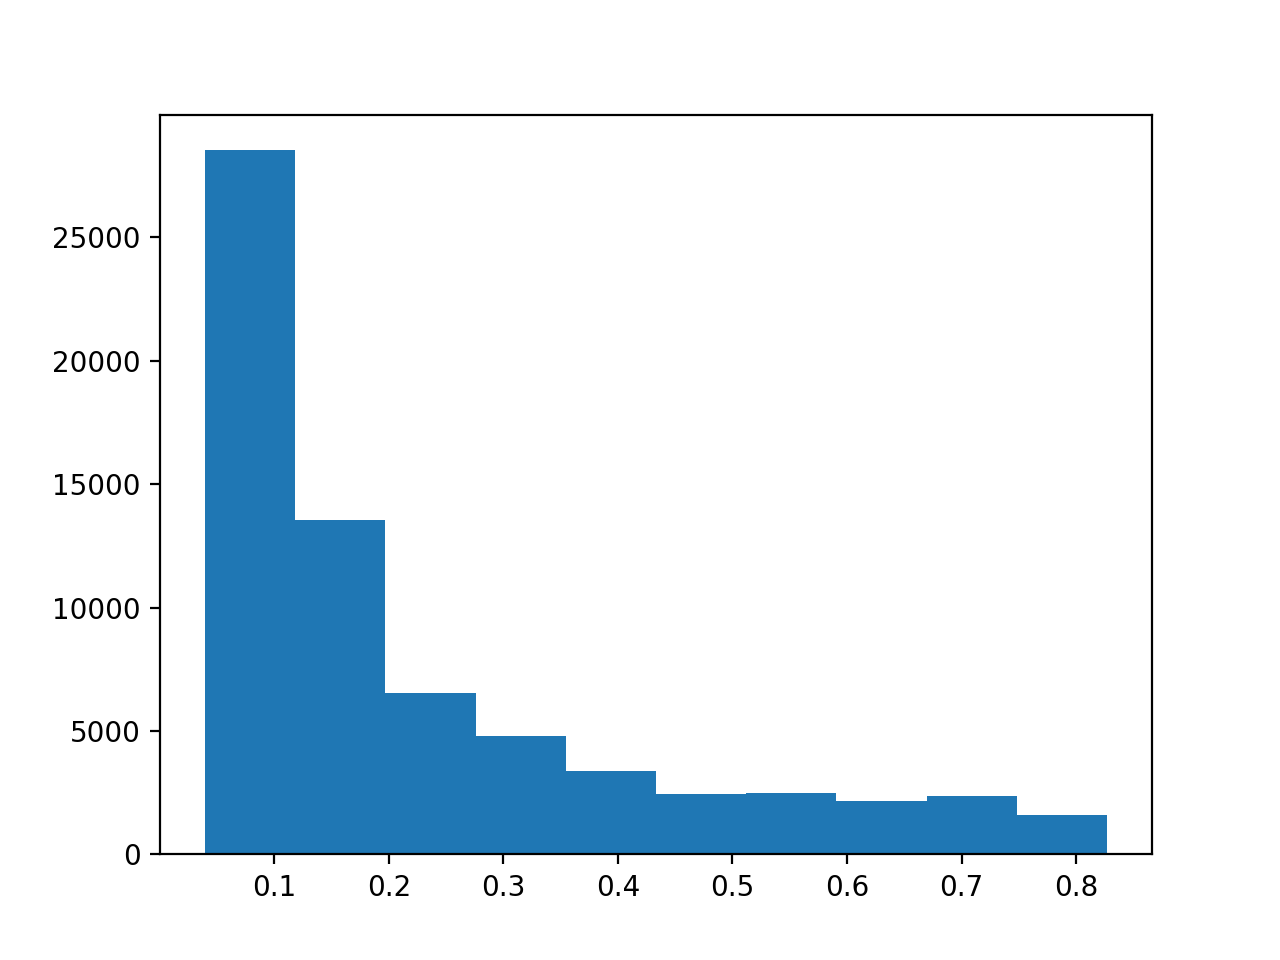

In [53]:
plt.hist(Submission['defects'])